# MIN-MAX

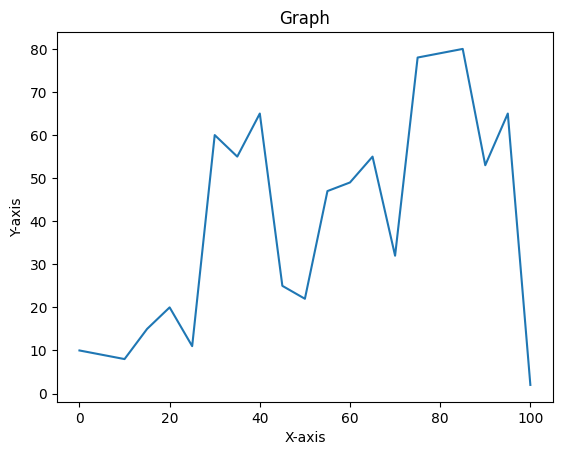

In [6]:
import matplotlib.pyplot as plt

x = [0, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
y = [10, 8, 15, 20, 11, 60, 55, 65, 25, 22, 47, 49, 55, 32, 78, 79, 80, 53, 65, 2]

plt.plot(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Graph')
plt.show()


2


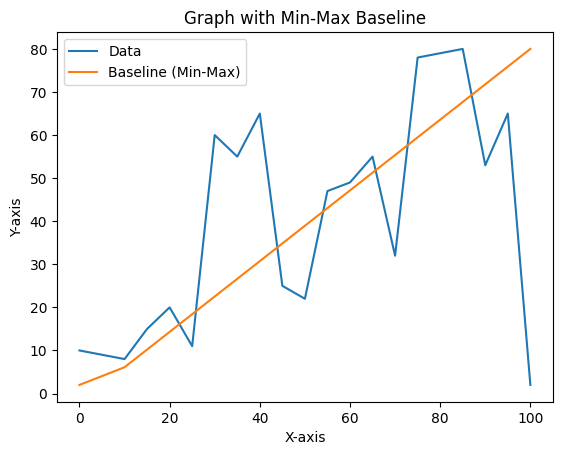

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = [0, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
y = [10, 8, 15, 20, 11, 60, 55, 65, 25, 22, 47, 49, 55, 32, 78, 79, 80, 53, 65, 2]

# 그래프 그리기
plt.plot(x, y, label="Data")

# Min-Max 기준선 그리기
baseline_min = np.min(y)
baseline_max = np.max(y)
baseline_line = np.linspace(baseline_min, baseline_max, len(x))
plt.plot(x, baseline_line, label="Baseline (Min-Max)")

print(baseline_min)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Graph with Min-Max Baseline')
plt.legend()
plt.show()


ValueError: ignored

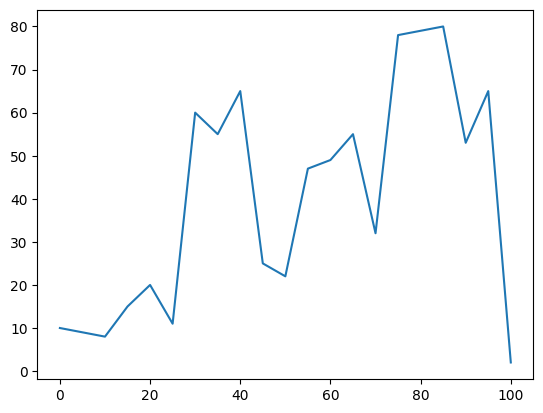

In [9]:
import matplotlib.pyplot as plt

x = [0, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
y = [10, 8, 15, 20, 11, 60, 55, 65, 25, 22, 47, 49, 55, 32, 78, 79, 80, 53, 65, 2]

# 첫 번째 값과 마지막 값으로 기준선 정의
baseline = [y[0], y[-1]]

# 그래프 그리기
plt.plot(x, y)
plt.plot(x, baseline, 'r--', label='Baseline')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Graph with Baseline')
plt.legend()
plt.show()


WARING max iteration reached!


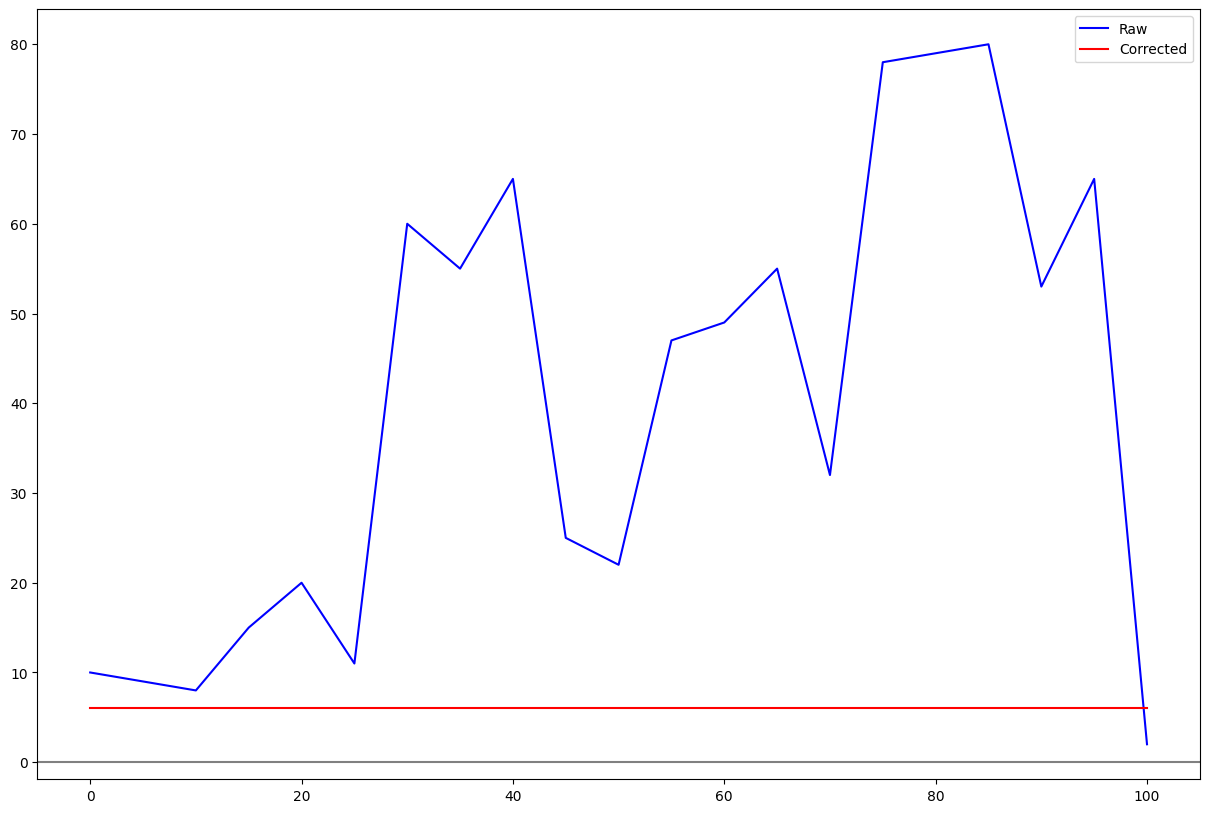

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 데이터 로드
#df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# 소수점 둘째 자리까지 반올림
#df = df.round(2)

# 관심 영역 선택 (ROI)
#roi_columns = df.columns[df.columns.str.startswith('ROI')]
#roi_data = df[roi_columns]

# X축 데이터
x = [0,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

# Y축 데이터
y =[10,8,15,20,11,60,55,65,25,22,47,49,55,32,78,79,80,53,65,2]

# 베이스라인 조정
baseObj = BaselineRemoval(y)
Zhangfit_output = baseObj.ZhangFit()

# 그래프 그리기
plt.figure(figsize=(15,10))

# raw 그래프
plt.plot(x, y, label='Raw', color='blue')

# Zhangfit 기준선과 보정된 그래프
baseline_zhangfit = Zhangfit_output
corrected_data = y - baseline_zhangfit
plt.plot(x, corrected_data, label='Corrected', color='red')

plt.axhline(y=0, color='gray')

plt.legend()
plt.show()


In [11]:
!pip install BaselineRemoval

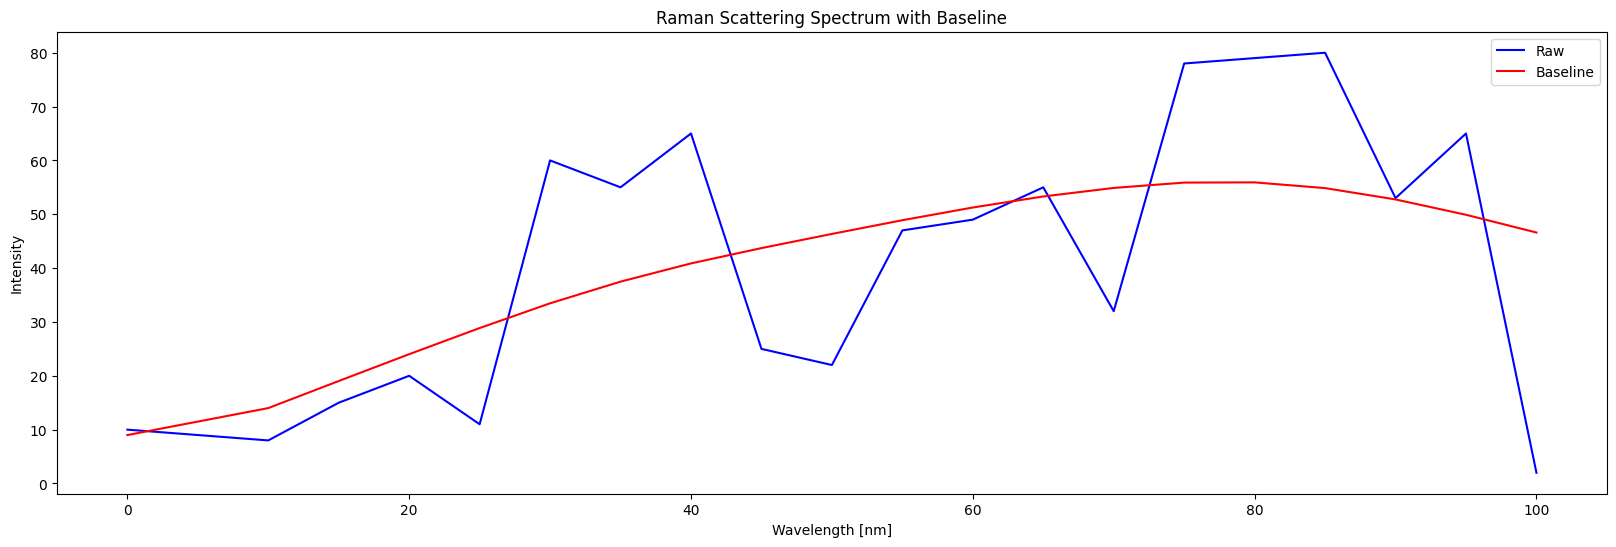

Peak value: 80


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import sparse
from scipy.sparse import linalg
from numpy.linalg import norm

# 데이터 로드
#df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# df라는 이름의 dataframe
#decimal_columns = df.columns[0:]  # 소수점 값이 있는 첫번째 열부터 시작

# 소수점 값을 소수점 둘째자리까지 반올림
#df[decimal_columns] = df[decimal_columns].round(2)

# apply 메소드를 사용해 사용자 정의 반올림 함수 지정 가능
#df[decimal_columns] = df[decimal_columns].apply(lambda x: round(x, 2))

# 관심 영역 선택 (ROI)
#roi_columns = df.columns[df.columns.str.startswith('ROI')]
#roi_data = df[roi_columns]

# X축 데이터
x = [0,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

# Y축 데이터
y =[10,8,15,20,11,60,55,65,25,22,47,49,55,32,78,79,80,53,65,2]

# Baseline 계산
def baseline_arPLS(y, ratio=1e-6, lam=100, niter=10):
    L = len(y)
    diag = np.ones(L - 2)
    D = sparse.spdiags([diag, -2 * diag, diag], [0, -1, -2], L, L - 2)
    H = lam * D.dot(D.T)
    w = np.ones(L)
    W = sparse.spdiags(w, 0, L, L)
    crit = 1
    count = 0
    while crit > ratio:
        z = linalg.spsolve(W + H, W * y)
        d = y - z
        dn = d[d < 0]
        m = np.mean(dn)
        s = np.std(dn)
        w_new = 1 / (1 + np.exp(2 * (d - (2 * s - m)) / s))
        crit = norm(w_new - w) / norm(w)
        w = w_new
        W.setdiag(w)
        count += 1
        if count > niter:
            print('Maximum number of iterations exceeded')
            break
    return z

baseline = baseline_arPLS(y)

# 그래프 그리기
plt.figure(figsize=(20, 6))
plt.plot(x, y, label='Raw', color='blue')
plt.plot(x, baseline, label='Baseline', color='red')

# 그래프 제목 설정
plt.title('Raman Scattering Spectrum with Baseline')

# x축, y축 레이블 설정
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity')

plt.legend()

# 그래프 표시
plt.show()

# 그래프 피크 값 출력
peaks = pd.Series(y, index=x).max()
print("Peak value:", peaks)


WARING max iteration reached!


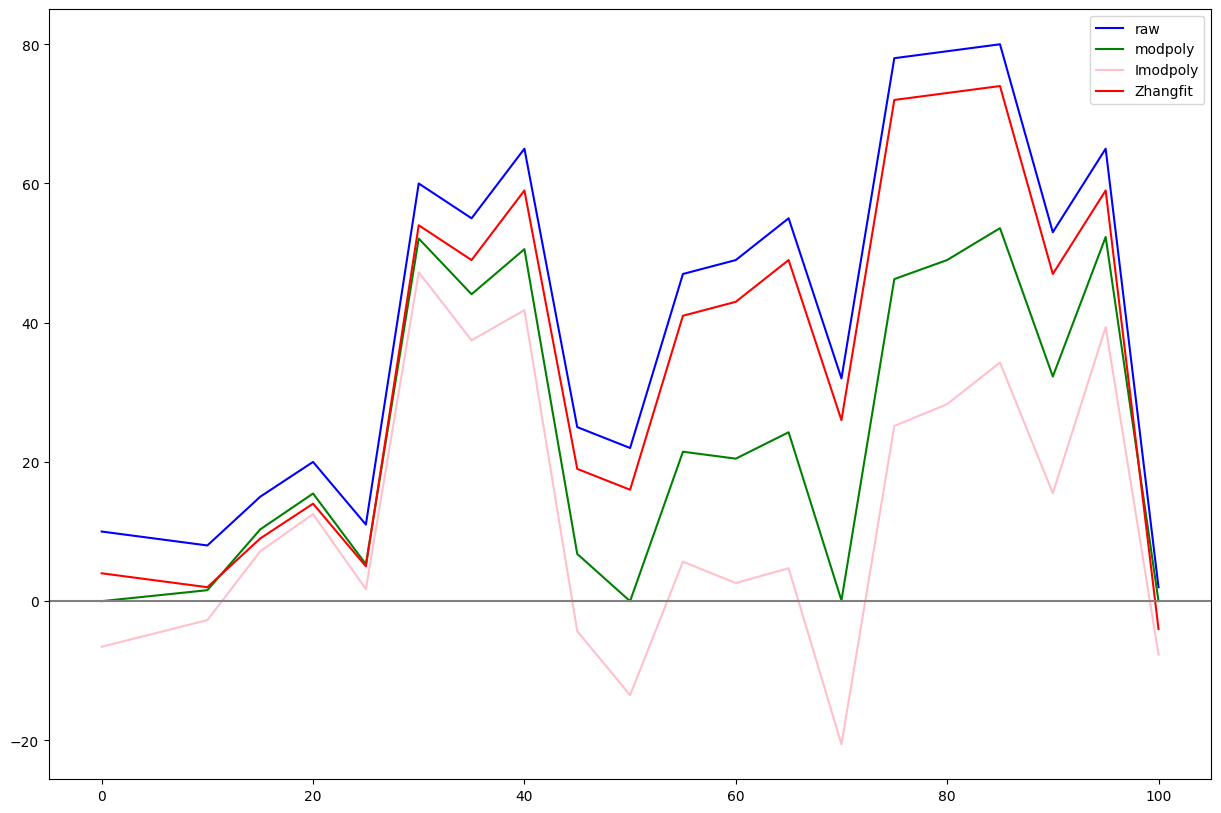

In [19]:
import numpy as np
import pandas as pd
import rampy
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 데이터 로드
#df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# 소수점 둘째 자리까지 반올림
#df = df.round(2)

# 관심 영역 선택 (ROI)
#roi_columns = df.columns[df.columns.str.startswith('ROI')]
#roi_data = df[roi_columns]

# X축 데이터
x = [0,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

# Y축 데이터
y =[10,8,15,20,11,60,55,65,25,22,47,49,55,32,78,79,80,53,65,2]

# 다항식 차수
polynomial_degree = 3

# 베이스라인 조정
baseObj = BaselineRemoval(y)
Modpoly_output = baseObj.ModPoly(polynomial_degree)
Imodpoly_output = baseObj.IModPoly(polynomial_degree)
Zhangfit_output = baseObj.ZhangFit()


# 그래프 그리기
plt.figure(figsize=(15,10))
plt.plot(x, y, label='raw', color='blue')
plt.plot(x, Modpoly_output, label='modpoly', color='green')
plt.plot(x, Imodpoly_output, label='Imodpoly', color='pink')
plt.plot(x, Zhangfit_output, label='Zhangfit', color='red')
plt.axhline(y=0, color='gray')

plt.legend()
plt.show()

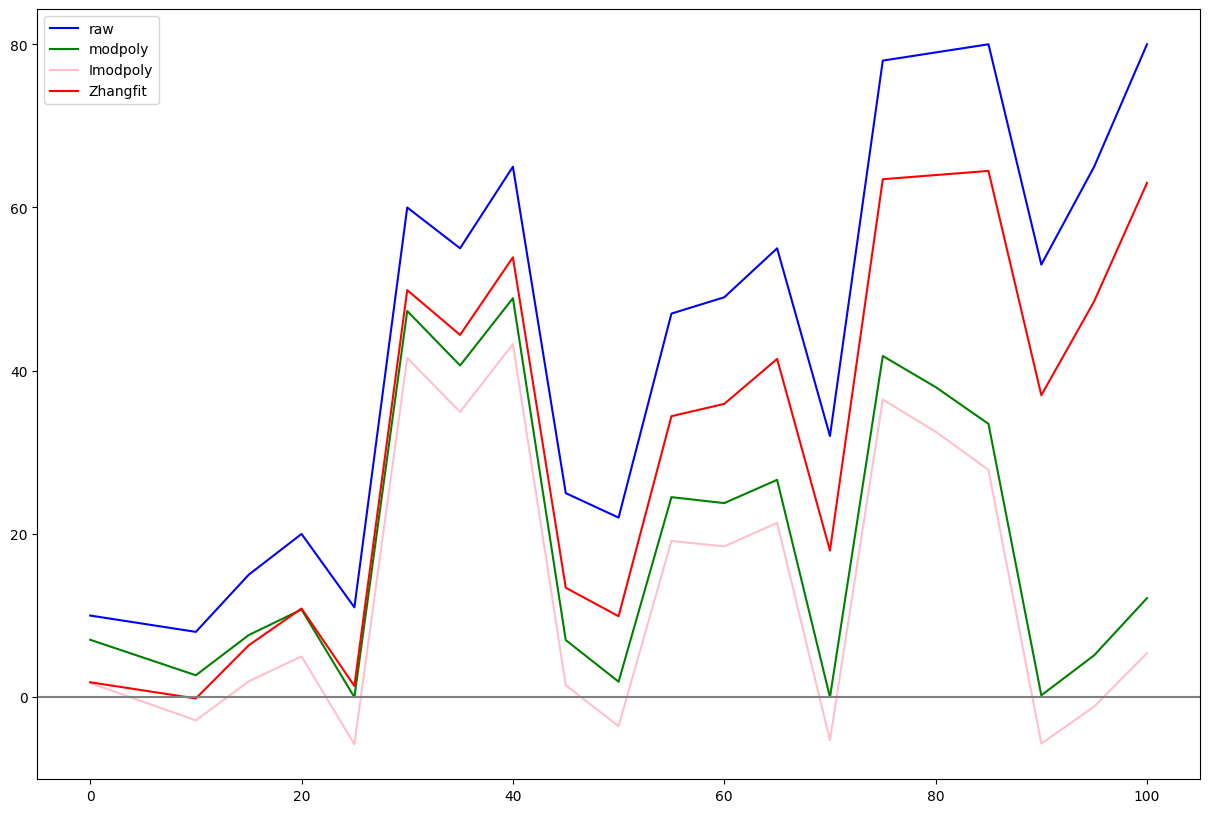

In [20]:
import numpy as np
import pandas as pd
import rampy
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 데이터 로드
#df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# 소수점 둘째 자리까지 반올림
#df = df.round(2)

# 관심 영역 선택 (ROI)
#roi_columns = df.columns[df.columns.str.startswith('ROI')]
#roi_data = df[roi_columns]

# X축 데이터
x = [0,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

# Y축 데이터
y =[10,8,15,20,11,60,55,65,25,22,47,49,55,32,78,79,80,53,65,80]

# 다항식 차수
polynomial_degree = 3

# 베이스라인 조정
baseObj = BaselineRemoval(y)
Modpoly_output = baseObj.ModPoly(polynomial_degree)
Imodpoly_output = baseObj.IModPoly(polynomial_degree)
Zhangfit_output = baseObj.ZhangFit()


# 그래프 그리기
plt.figure(figsize=(15,10))
plt.plot(x, y, label='raw', color='blue')
plt.plot(x, Modpoly_output, label='modpoly', color='green')
plt.plot(x, Imodpoly_output, label='Imodpoly', color='pink')
plt.plot(x, Zhangfit_output, label='Zhangfit', color='red')
plt.axhline(y=0, color='gray')

plt.legend()
plt.show()

WARING max iteration reached!


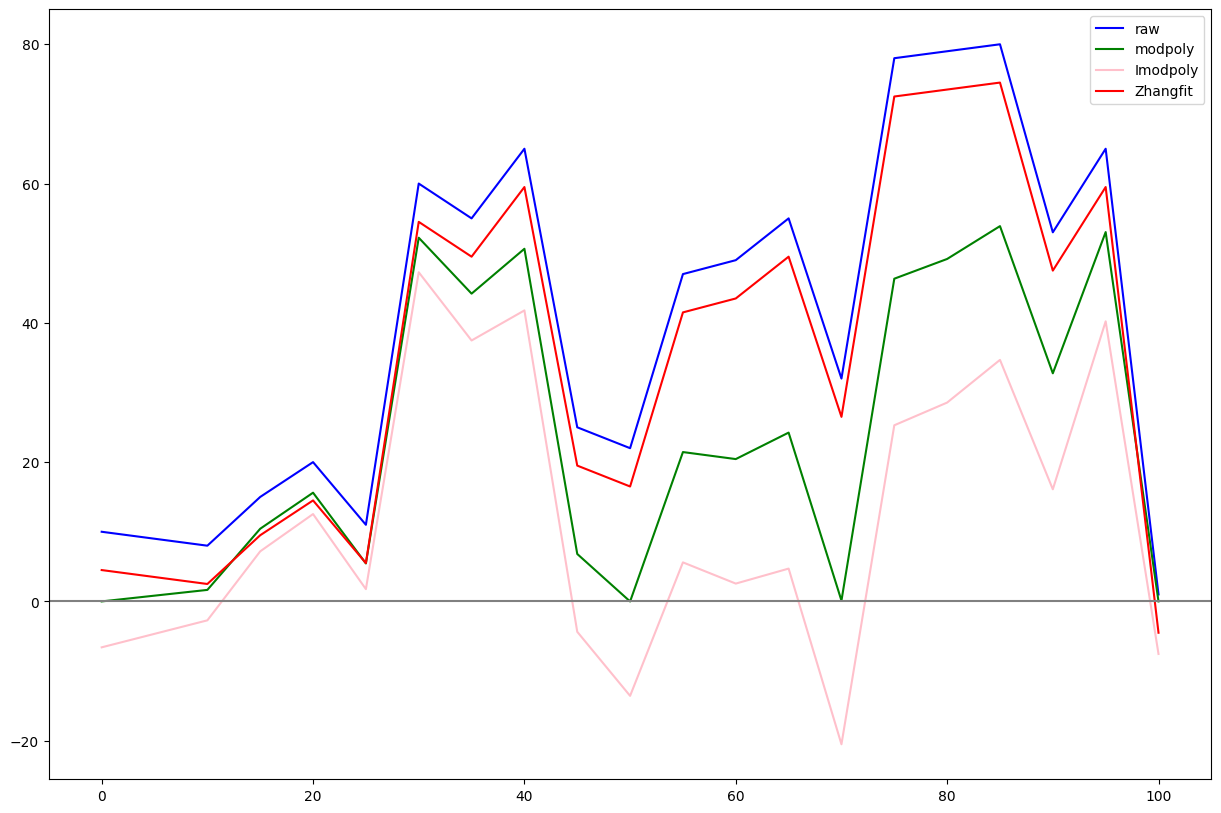

In [21]:
import numpy as np
import pandas as pd
import rampy
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 데이터 로드
#df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# 소수점 둘째 자리까지 반올림
#df = df.round(2)

# 관심 영역 선택 (ROI)
#roi_columns = df.columns[df.columns.str.startswith('ROI')]
#roi_data = df[roi_columns]

# X축 데이터
x = [0,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

# Y축 데이터
y =[10,8,15,20,11,60,55,65,25,22,47,49,55,32,78,79,80,53,65,1]

# 다항식 차수
polynomial_degree = 3

# 베이스라인 조정
baseObj = BaselineRemoval(y)
Modpoly_output = baseObj.ModPoly(polynomial_degree)
Imodpoly_output = baseObj.IModPoly(polynomial_degree)
Zhangfit_output = baseObj.ZhangFit()


# 그래프 그리기
plt.figure(figsize=(15,10))
plt.plot(x, y, label='raw', color='blue')
plt.plot(x, Modpoly_output, label='modpoly', color='green')
plt.plot(x, Imodpoly_output, label='Imodpoly', color='pink')
plt.plot(x, Zhangfit_output, label='Zhangfit', color='red')
plt.axhline(y=0, color='gray')

plt.legend()
plt.show()

WARING max iteration reached!


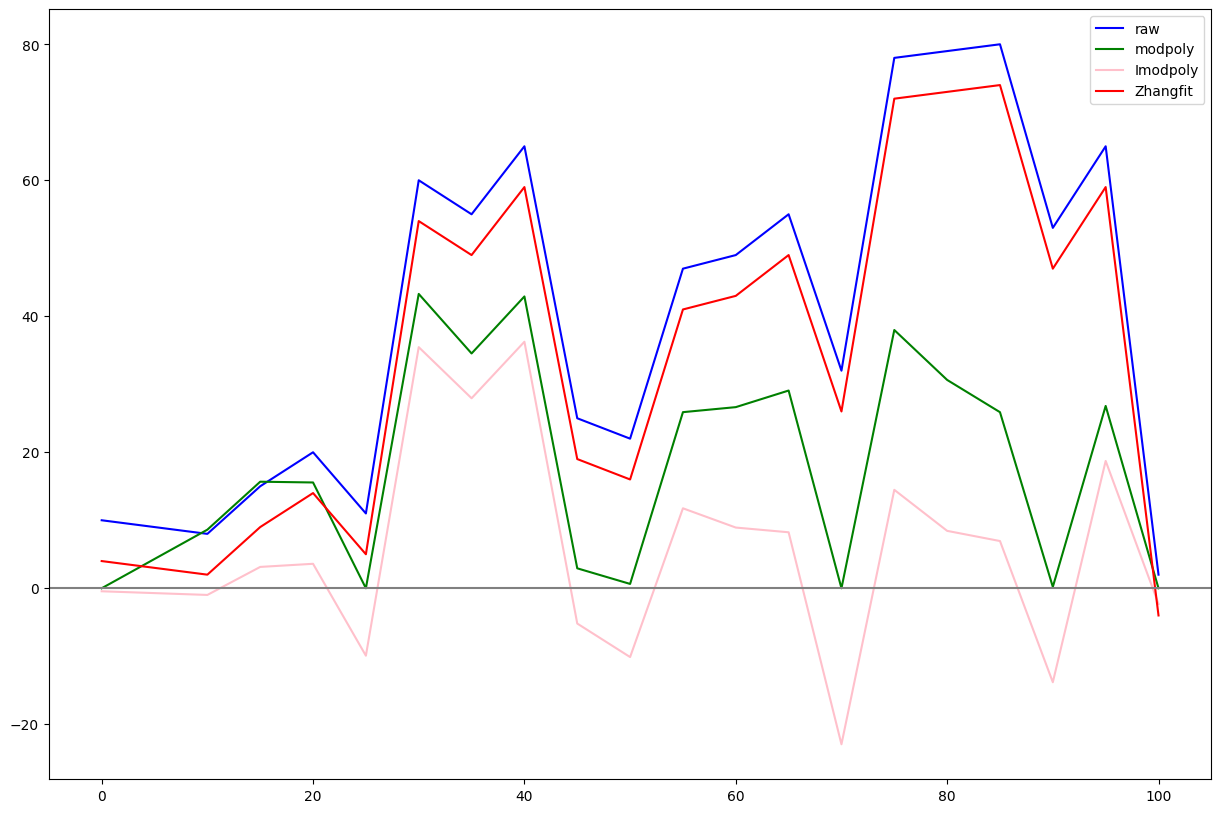

In [22]:
import numpy as np
import pandas as pd
import rampy
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 데이터 로드
#df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# 소수점 둘째 자리까지 반올림
#df = df.round(2)

# 관심 영역 선택 (ROI)
#roi_columns = df.columns[df.columns.str.startswith('ROI')]
#roi_data = df[roi_columns]

# X축 데이터
x = [0,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

# Y축 데이터
y =[10,8,15,20,11,60,55,65,25,22,47,49,55,32,78,79,80,53,65,2]

# 다항식 차수
polynomial_degree = 5

# 베이스라인 조정
baseObj = BaselineRemoval(y)
Modpoly_output = baseObj.ModPoly(polynomial_degree)
Imodpoly_output = baseObj.IModPoly(polynomial_degree)
Zhangfit_output = baseObj.ZhangFit()


# 그래프 그리기
plt.figure(figsize=(15,10))
plt.plot(x, y, label='raw', color='blue')
plt.plot(x, Modpoly_output, label='modpoly', color='green')
plt.plot(x, Imodpoly_output, label='Imodpoly', color='pink')
plt.plot(x, Zhangfit_output, label='Zhangfit', color='red')
plt.axhline(y=0, color='gray')

plt.legend()
plt.show()

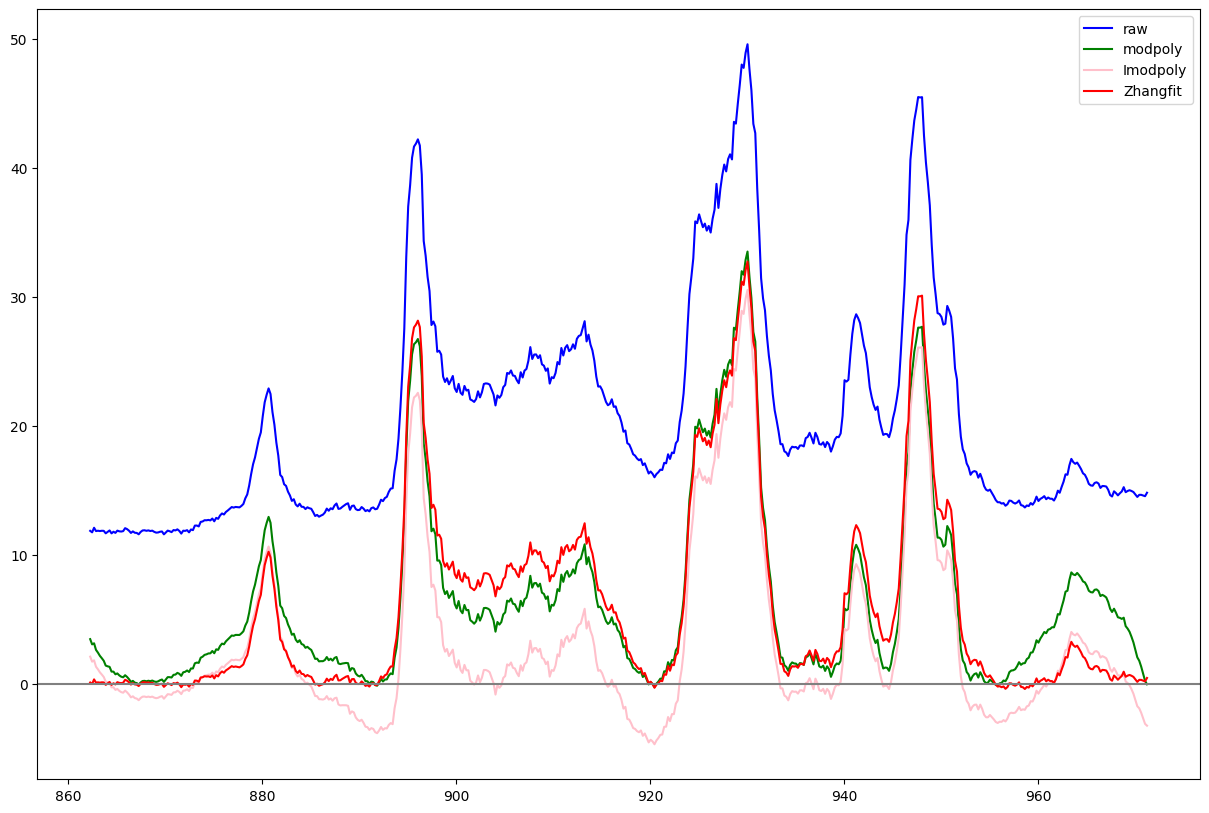

In [24]:
import numpy as np
import pandas as pd
import rampy
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 데이터 로드
df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# 소수점 둘째 자리까지 반올림
df = df.round(2)

# 관심 영역 선택 (ROI)
roi_columns = df.columns[df.columns.str.startswith('ROI')]
roi_data = df[roi_columns]

# X축 데이터
x = df['Axis [nm]'].values

# Y축 데이터
y = roi_data.mean(axis=1).values  # pandas Series에서 numpy 배열로 변환

# 다항식 차수
polynomial_degree = 7

# 베이스라인 조정
baseObj = BaselineRemoval(y)
Modpoly_output = baseObj.ModPoly(polynomial_degree)
Imodpoly_output = baseObj.IModPoly(polynomial_degree)
Zhangfit_output = baseObj.ZhangFit()

#print('Raw Data:',y)
#print('Modpoly base corrected values:',Modpoly_output)
#print('IModPoly base corrected values:',Imodpoly_output)
#print('ZhangFit base corrected values:',Zhangfit_output)

# 그래프 그리기
plt.figure(figsize=(15,10))
plt.plot(x, y, label='raw', color='blue')
plt.plot(x, Modpoly_output, label='modpoly', color='green')
plt.plot(x, Imodpoly_output, label='Imodpoly', color='pink')
plt.plot(x, Zhangfit_output, label='Zhangfit', color='red')
plt.axhline(y=0, color='gray')

plt.legend()
plt.show()

기준점 개수: 3


TypeError: ignored

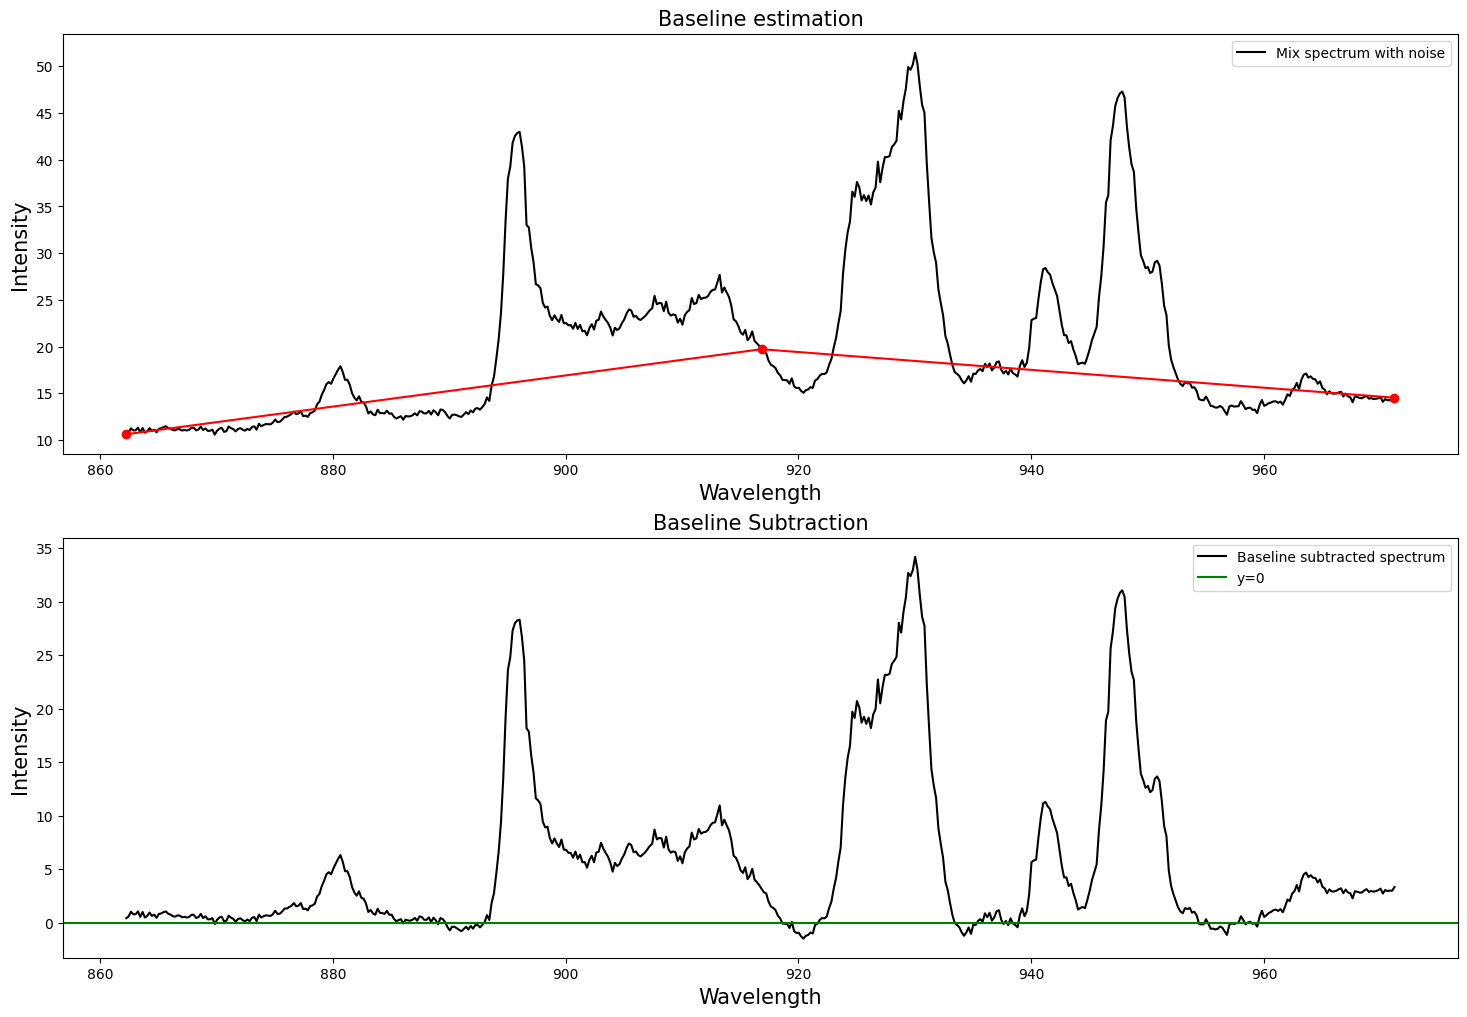

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.signal import find_peaks, peak_prominences

# 파일 불러오기
file = '/content/UR2 BXPC3 raman raw data__24h.csv'
df = pd.read_csv(file)
# x축 값 지정
x = df['Axis [nm]'].replace('[\$,]', '', regex=True).astype(float)

# y축 값 지정
y = df['ROI 1 []'].replace('[\$,]', '', regex=True).astype(float)

# 기준점 개수 n 입력받기
n = int(input("기준점 개수: "))

# 기준점 예외처리
if n < 2:
    print("기준점은 2개 이상 필요합니다.")
    exit()

# 기준점 인덱스
nlist = []
for i in range(0, n - 1):
    nlist.append(int(len(x) / (n - 1) * i))
nlist.append(len(x) - 1)

# 기준점 x, y좌표
c = []
d = []
for i in nlist:
    c.append(x[i])
    d.append(y[i])

# Baseline estimation 함수
def baseline_als(y, lam, p, niter=100):
    L = len(y)
    D = sparse.diags([1, -2, 1], [0, -1, -2], shape=(L, L - 2))
    w = np.ones(L)
    for i in range(niter):
        W = sparse.spdiags(w, 0, L, L)
        Z = W + lam * D.dot(D.transpose())
        z = spsolve(Z, w * y)
        w = p * (y > z) + (1 - p) * (y < z)
    return z

# Baseline subtraction을 적용한 데이터
baseline_subtracted = y - baseline_als(y, lam=10**5, p=0.01)

# 추가 데이터
additional_data = pd.read_excel('/content/additional_data.xlsx')

# 필요한 성분과 해당하는 주파수 가져오기
assignment = additional_data['Assignment']
frequency = additional_data['Frequency(RAMAN)']
sample = additional_data['Samle']

# 그래프 형식 지정
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12))

# ax1 그래프 (기존, 기준점)
ax1.plot(x, y, color='black', label='Mix spectrum with noise')
ax1.plot(c, d, 'ro-')
ax1.set_title('Baseline estimation', fontsize=15)
ax1.set_xlabel('Wavelength', fontsize=15)
ax1.set_ylabel('Intensity', fontsize=15)
ax1.legend()

# ax2 그래프 (기준점 삭제된 그래프)
ax2.plot(x, baseline_subtracted, color='black', label='Baseline subtracted spectrum')
ax2.axhline(y=0, color='green', label='y=0')
ax2.set_title('Baseline Subtraction', fontsize=15)
ax2.set_xlabel('Wavelength', fontsize=15)
ax2.set_ylabel('Intensity', fontsize=15)
ax2.legend()

# 피크점 수치 출력
for i in range(len(peaks)):
    x_value = x[peaks[i]]  # 피크의 x 값
    y_value = baseline_subtracted[peaks[i]]  # 피크의 y 값
    ax2.text(x_value, y_value, f'({x_value:.2f}, {y_value:.2f})', fontsize=8, verticalalignment='bottom')

# 그래프 띄우기
plt.show()


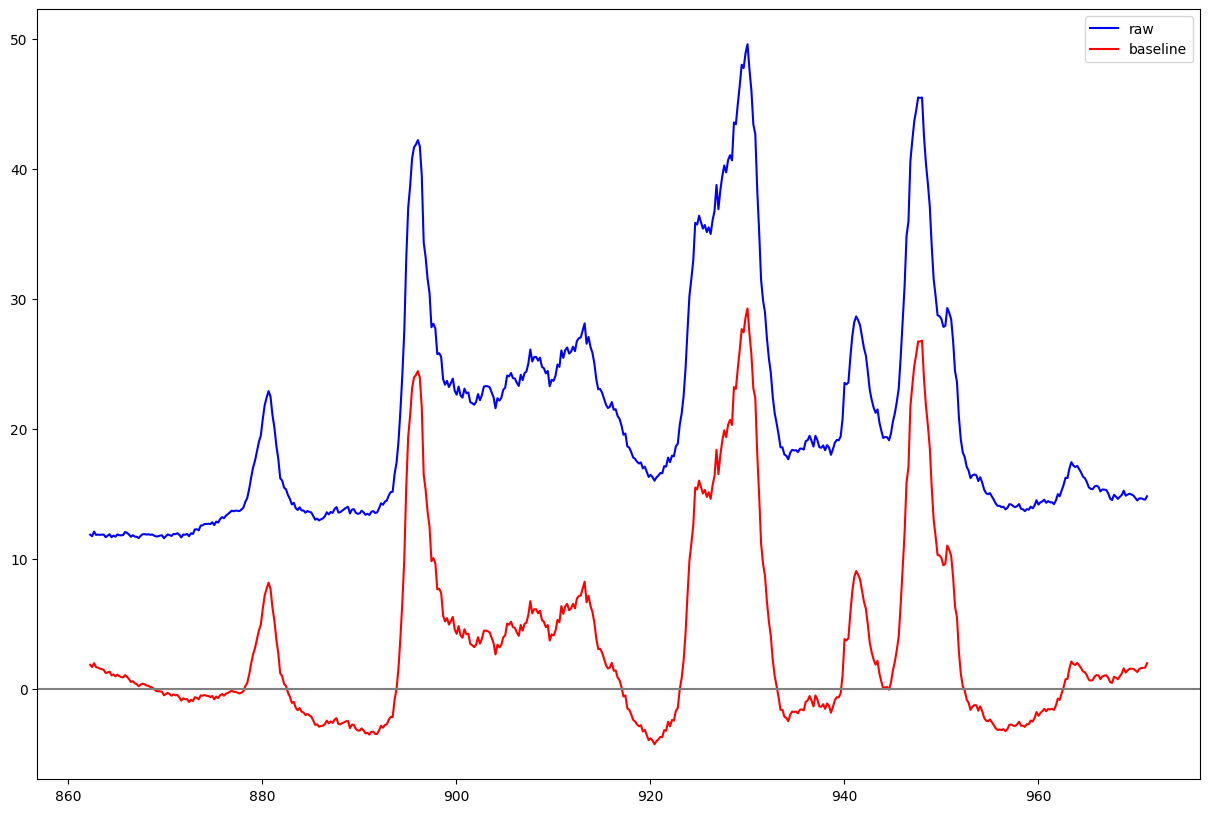

In [29]:
import numpy as np
import pandas as pd
import rampy
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 데이터 로드
df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# 소수점 둘째 자리까지 반올림
df = df.round(2)

# 관심 영역 선택 (ROI)
roi_columns = df.columns[df.columns.str.startswith('ROI')]
roi_data = df[roi_columns]

# X축 데이터
x = df['Axis [nm]'].values

# Y축 데이터
y = roi_data.mean(axis=1).values  # pandas Series에서 numpy 배열로 변환

# 다항식 차수
polynomial_degree = 3

# Baseline 계산
baseObj = BaselineRemoval(y)
baseline_output = baseObj.IModPoly(polynomial_degree)

# 그래프 그리기
plt.figure(figsize=(15, 10))
plt.plot(x, y, label='raw', color='blue')
plt.plot(x, baseline_output, label='baseline', color='red')
plt.axhline(y=0, color='gray')

plt.legend()
plt.show()


In [30]:
import pandas as pd
import numpy as np
import rampy
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 파일 불러오기
file = '/content/UR2 BXPC3 raman raw data__24h.csv'
df = pd.read_csv(file)
# x축 값 지정
x = df['Axis [nm]'].replace('[\$,]', '', regex=True).astype(float)

# y축 값 지정
y = df['ROI 1 []'].replace('[\$,]', '', regex=True).astype(float)

# 기준점 개수 n 입력받기
n = int(input("기준점 개수: "))

# 기준점 예외처리
if n < 2:
    print("기준점은 2개 이상 필요합니다.")
    exit()

# 기준점 인덱스
nlist = []
for i in range(0, n - 1):
    nlist.append(int(len(x) / (n - 1) * i))
nlist.append(len(x) - 1)

# 기준점 x, y좌표
c = []
d = []
for i in nlist:
    c.append(x[i])
    d.append(y[i])

# 다항식 차수
polynomial_degree = 7

# Baseline 계산
baseObj = BaselineRemoval(y)
baseline_output = baseObj.IModPoly(polynomial_degree, n=n)

# 그래프 형식 지정
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12))

# ax1 그래프 (기존, 기준점)
ax1.plot(x, y, color='black', label='Mix spectrum with noise')
ax1.plot(c, d, 'ro-')
ax1.set_title('Baseline estimation', fontsize=15)
ax1.set_xlabel('Wavelength', fontsize=15)
ax1.set_ylabel('Intensity', fontsize=15)
ax1.legend()

# ax2 그래프 (기준점 삭제된 그래프 + Baseline)
ax2.plot(x, y - baseline_output, color='black', label='Baseline subtracted spectrum')
ax2.axhline(y=0, color='green', label='y=0')
ax2.set_title('Baseline Subtraction', fontsize=15)
ax2.set_xlabel('Wavelength', fontsize=15)
ax2.set_ylabel('Intensity', fontsize=15)
ax2.legend()

# 그래프 띄우기
plt.show()


기준점 개수: 3


TypeError: ignored

In [31]:
import pandas as pd
import numpy as np
import rampy
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 파일 불러오기
file = '/content/UR2 BXPC3 raman raw data__24h.csv'
df = pd.read_csv(file)
# x축 값 지정
x = df['Axis [nm]'].replace('[\$,]', '', regex=True).astype(float)

# y축 값 지정
y = df['ROI 1 []'].replace('[\$,]', '', regex=True).astype(float)

# 기준점 개수 n 입력받기
n = int(input("기준점 개수: "))

# 기준점 예외처리
if n < 2:
    print("기준점은 2개 이상 필요합니다.")
    exit()

# 기준점 인덱스
nlist = []
for i in range(0, n - 1):
    nlist.append(int(len(x) / (n - 1) * i))
nlist.append(len(x) - 1)

# 기준점 x, y좌표
c = []
d = []
for i in nlist:
    c.append(x[i])
    d.append(y[i])

# 다항식 차수
polynomial_degree = 7

# Baseline 계산
baseObj = BaselineRemoval(y)
baseObj.set_baseline()
baseObj.IModPoly(polynomial_degree)

# baseline 적용
baseline_output = baseObj.baseline

# 그래프 형식 지정
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12))

# ax1 그래프 (기존, 기준점)
ax1.plot(x, y, color='black', label='Mix spectrum with noise')
ax1.plot(c, d, 'ro-')
ax1.set_title('Baseline estimation', fontsize=15)
ax1.set_xlabel('Wavelength', fontsize=15)
ax1.set_ylabel('Intensity', fontsize=15)
ax1.legend()

# ax2 그래프 (기준점 삭제된 그래프 + Baseline)
ax2.plot(x, y - baseline_output, color='black', label='Baseline subtracted spectrum')
ax2.axhline(y=0, color='green', label='y=0')
ax2.set_title('Baseline Subtraction', fontsize=15)
ax2.set_xlabel('Wavelength', fontsize=15)
ax2.set_ylabel('Intensity', fontsize=15)
ax2.legend()

# 그래프 띄우기
plt.show()


기준점 개수: 3


AttributeError: ignored

In [32]:
import pandas as pd
import numpy as np
import rampy
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 파일 불러오기
file = '/content/UR2 BXPC3 raman raw data__24h.csv'
df = pd.read_csv(file)
# x축 값 지정
x = df['Axis [nm]'].replace('[\$,]', '', regex=True).astype(float)

# y축 값 지정
y = df['ROI 1 []'].replace('[\$,]', '', regex=True).astype(float)

# 기준점 개수 n 입력받기
n = int(input("기준점 개수: "))

# 기준점 예외처리
if n < 2:
    print("기준점은 2개 이상 필요합니다.")
    exit()

# 기준점 인덱스
nlist = []
for i in range(0, n - 1):
    nlist.append(int(len(x) / (n - 1) * i))
nlist.append(len(x) - 1)

# 기준점 x, y좌표
c = []
d = []
for i in nlist:
    c.append(x[i])
    d.append(y[i])

# 다항식 차수
polynomial_degree = 7

# Baseline 계산
baseObj = BaselineRemoval(y, x=x, pol_degree=polynomial_degree)
baseObj.IModPoly()

# baseline 적용
baseline_output = baseObj.baseline

# 그래프 형식 지정
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12))

# ax1 그래프 (기존, 기준점)
ax1.plot(x, y, color='black', label='Mix spectrum with noise')
ax1.plot(c, d, 'ro-')
ax1.set_title('Baseline estimation', fontsize=15)
ax1.set_xlabel('Wavelength', fontsize=15)
ax1.set_ylabel('Intensity', fontsize=15)
ax1.legend()

# ax2 그래프 (기준점 삭제된 그래프 + Baseline)
ax2.plot(x, y - baseline_output, color='black', label='Baseline subtracted spectrum')
ax2.axhline(y=0, color='green', label='y=0')
ax2.set_title('Baseline Subtraction', fontsize=15)
ax2.set_xlabel('Wavelength', fontsize=15)
ax2.set_ylabel('Intensity', fontsize=15)
ax2.legend()

# 그래프 띄우기
plt.show()


기준점 개수: 3


TypeError: ignored

In [34]:
import pandas as pd
import numpy as np
import rampy
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 파일 불러오기
file = '/content/UR2 BXPC3 raman raw data__24h.csv'
df = pd.read_csv(file)
# x축 값 지정
x = df['Axis [nm]'].replace('[\$,]', '', regex=True).astype(float)

# y축 값 지정
y = df['ROI 1 []'].replace('[\$,]', '', regex=True).astype(float)

# 기준점 개수 n 입력받기
n = int(input("기준점 개수: "))

# 기준점 예외처리
if n < 2:
    print("기준점은 2개 이상 필요합니다.")
    exit()

# 기준점 인덱스
nlist = []
for i in range(0, n - 1):
    nlist.append(int(len(x) / (n - 1) * i))
nlist.append(len(x) - 1)

# 기준점 x, y좌표
c = []
d = []
for i in nlist:
    c.append(x[i])
    d.append(y[i])

# 다항식 차수
polynomial_degree = 7

# Baseline 계산
baseObj = BaselineRemoval(y)
baseObj.IModPoly(degree=polynomial_degree)

# baseline 적용
baseline_output = baseObj.baseline

# 그래프 형식 지정
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12))

# ax1 그래프 (기존, 기준점)
ax1.plot(x, y, color='black', label='Mix spectrum with noise')
ax1.plot(c, d, 'ro-')
ax1.set_title('Baseline estimation', fontsize=15)
ax1.set_xlabel('Wavelength', fontsize=15)
ax1.set_ylabel('Intensity', fontsize=15)
ax1.legend()

# ax2 그래프 (기준점 삭제된 그래프 + Baseline)
ax2.plot(x, y - baseline_output, color='black', label='Baseline subtracted spectrum')
ax2.axhline(y=0, color='green', label='y=0')
ax2.set_title('Baseline Subtraction', fontsize=15)
ax2.set_xlabel('Wavelength', fontsize=15)
ax2.set_ylabel('Intensity', fontsize=15)
ax2.legend()

# 그래프 띄우기
plt.show()


기준점 개수: 3


AttributeError: ignored

In [35]:
!pip install BaselineRemoval

In [36]:
import pandas as pd
import numpy as np
import rampy
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 파일 불러오기
file = '/content/UR2 BXPC3 raman raw data__24h.csv'
df = pd.read_csv(file)
# x축 값 지정
x = df['Axis [nm]'].replace('[\$,]', '', regex=True).astype(float)

# y축 값 지정
y = df['ROI 1 []'].replace('[\$,]', '', regex=True).astype(float)

# 기준점 개수 n 입력받기
n = int(input("기준점 개수: "))

# 기준점 예외처리
if n < 2:
    print("기준점은 2개 이상 필요합니다.")
    exit()

# 기준점 인덱스
nlist = []
for i in range(0, n - 1):
    nlist.append(int(len(x) / (n - 1) * i))
nlist.append(len(x) - 1)

# 기준점 x, y좌표
c = []
d = []
for i in nlist:
    c.append(x[i])
    d.append(y[i])

# 다항식 차수
polynomial_degree = 7

# Baseline 계산
baseObj = BaselineRemoval(y)
baseObj.IModPoly(degree=polynomial_degree)
baseline_output = baseObj.IModPoly_output

# baseline 적용
baseline_subtracted = y - baseline_output

# 그래프 형식 지정
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12))

# ax1 그래프 (기존, 기준점)
ax1.plot(x, y, color='black', label='Mix spectrum with noise')
ax1.plot(c, d, 'ro-')
ax1.set_title('Baseline estimation', fontsize=15)
ax1.set_xlabel('Wavelength', fontsize=15)
ax1.set_ylabel('Intensity', fontsize=15)
ax1.legend()

# ax2 그래프 (기준점 삭제된 그래프 + Baseline)
ax2.plot(x, baseline_subtracted, color='black', label='Baseline subtracted spectrum')
ax2.axhline(y=0, color='green', label='y=0')
ax2.set_title('Baseline Subtraction', fontsize=15)
ax2.set_xlabel('Wavelength', fontsize=15)
ax2.set_ylabel('Intensity', fontsize=15)
ax2.legend()

# 그래프 띄우기
plt.show()


기준점 개수: 3


AttributeError: ignored

기준점 개수: 3


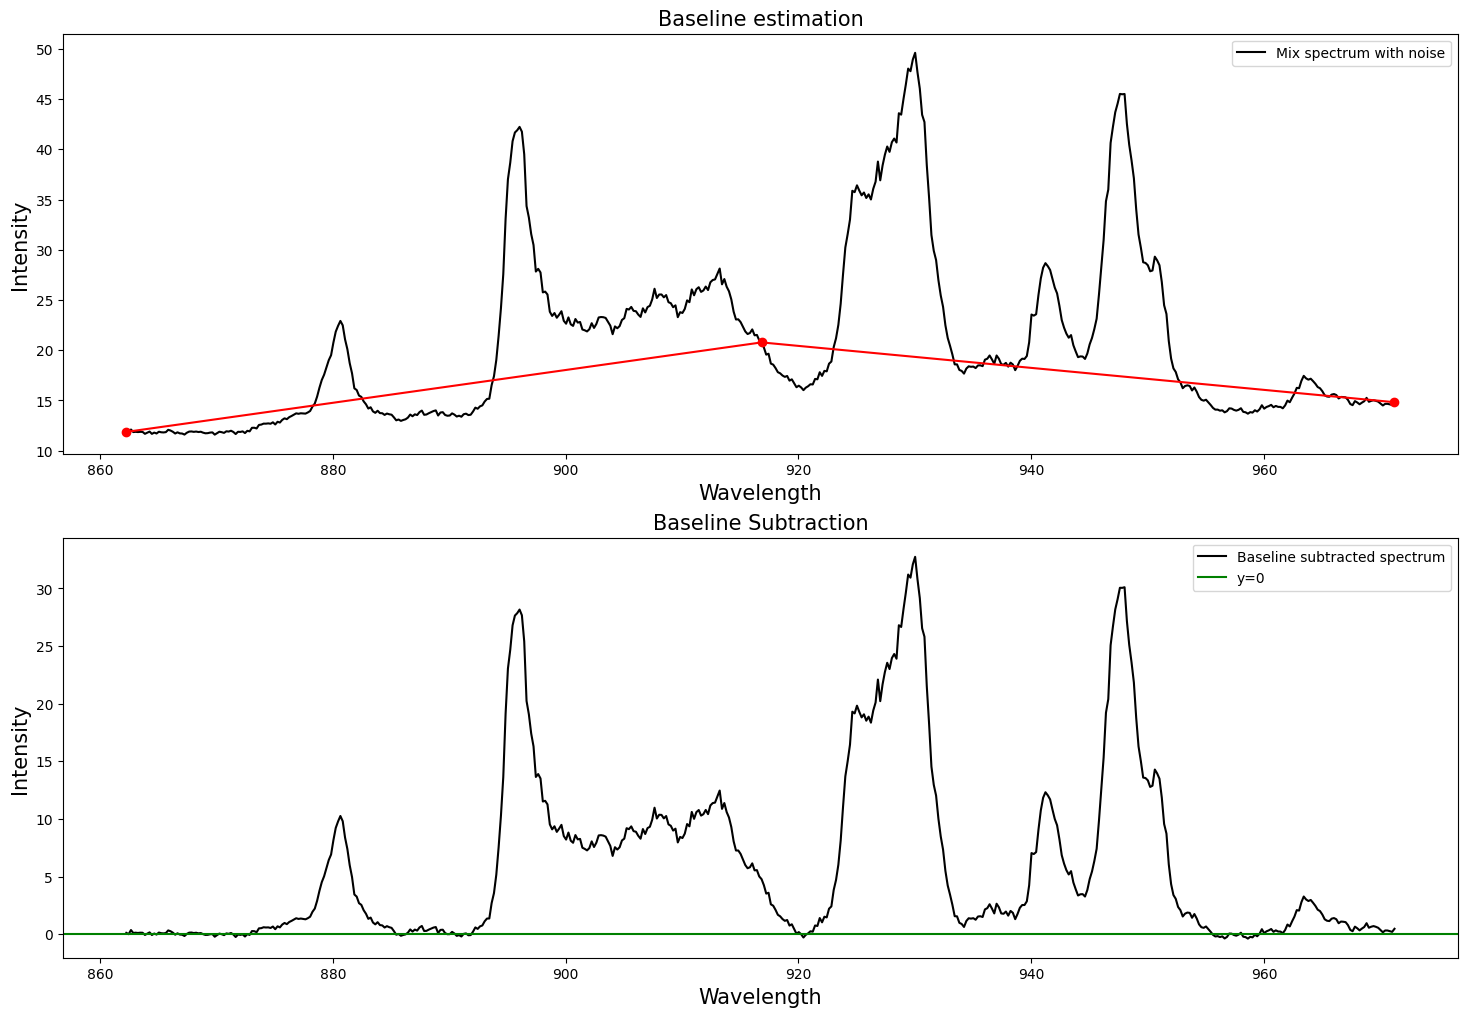

In [43]:
import pandas as pd
import numpy as np
import rampy
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 파일 불러오기
file = '/content/UR2 BXPC3 raman raw data__24h.csv'
df = pd.read_csv(file)
# X축 데이터
x = df['Axis [nm]'].values

# Y축 데이터
y = roi_data.mean(axis=1).values  # pandas Series에서 numpy 배열로 변환

# 기준점 개수 n 입력받기
n = int(input("기준점 개수: "))

# 기준점 예외처리
if n < 2:
    print("기준점은 2개 이상 필요합니다.")
    exit()

# 기준점 인덱스
nlist = []
for i in range(0, n - 1):
    nlist.append(int(len(x) / (n - 1) * i))
nlist.append(len(x) - 1)

# 기준점 x, y좌표
c = []
d = []
for i in nlist:
    c.append(x[i])
    d.append(y[i])

# 다항식 차수
polynomial_degree = 3

# Baseline 계산
baseObj = BaselineRemoval(y)
#baseline_output = baseObj.IModPoly(polynomial_degree)
Zhangfit_output = baseObj.ZhangFit()

# baseline 적용
#baseline_subtracted = y - baseline_output

# 그래프 형식 지정
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12))

# ax1 그래프 (기존, 기준점)
ax1.plot(x, y, color='black', label='Mix spectrum with noise')
ax1.plot(c, d, 'ro-')
ax1.set_title('Baseline estimation', fontsize=15)
ax1.set_xlabel('Wavelength', fontsize=15)
ax1.set_ylabel('Intensity', fontsize=15)
ax1.legend()


# ax2 그래프 (기준점 삭제된 그래프 + Baseline)
ax2.plot(x, Zhangfit_output, color='black', label='Baseline subtracted spectrum')
ax2.axhline(y=0, color='green', label='y=0')
ax2.set_title('Baseline Subtraction', fontsize=15)
ax2.set_xlabel('Wavelength', fontsize=15)
ax2.set_ylabel('Intensity', fontsize=15)
ax2.legend()

# 그래프 띄우기
plt.show()


기준점 개수: 5
Maximum number of iterations exceeded


ValueError: ignored

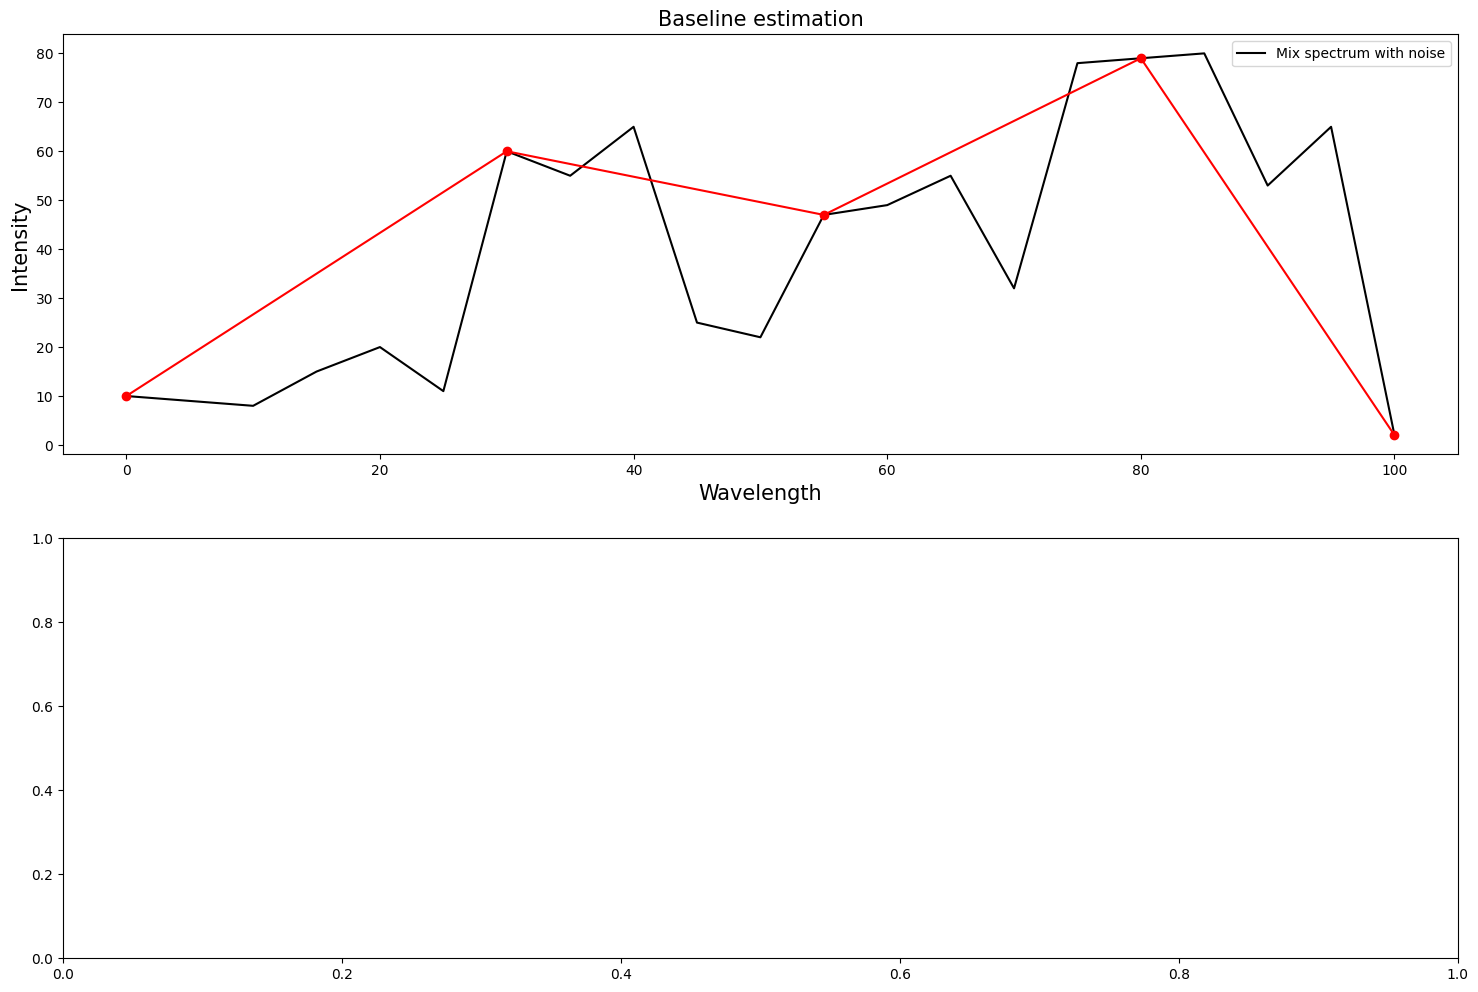

In [51]:
import pandas as pd
import numpy as np
import rampy
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 파일 불러오기
file = '/content/UR2 BXPC3 raman raw data__24h.csv'
df = pd.read_csv(file)

# 스펙트럼 계산
wavelengths = df['Axis [nm]'].values
intensities = roi_data.mean(axis=1).values

# 기준점 개수 n 입력받기
n = int(input("기준점 개수: "))

# 기준점 예외처리
if n < 2:
    print("기준점은 2개 이상 필요합니다.")
    exit()

# 기준점 인덱스
nlist = []
for i in range(0, n - 1):
    nlist.append(int(len(x) / (n - 1) * i))
nlist.append(len(x) - 1)

# 기준점 x, y좌표
c = []
d = []
for i in nlist:
    c.append(x[i])
    d.append(y[i])


# Baseline 계산
def baseline_arPLS(y, ratio=1e-6, lam=100, niter=10):
    L = len(y)
    diag = np.ones(L - 2)
    D = sparse.spdiags([diag, -2 * diag, diag], [0, -1, -2], L, L - 2)
    H = lam * D.dot(D.T)
    w = np.ones(L)
    W = sparse.spdiags(w, 0, L, L)
    crit = 1
    count = 0
    while crit > ratio:
        z = linalg.spsolve(W + H, W * y)
        d = y - z
        dn = d[d < 0]
        m = np.mean(dn)
        s = np.std(dn)
        w_new = 1 / (1 + np.exp(2 * (d - (2 * s - m)) / s))
        crit = norm(w_new - w) / norm(w)
        w = w_new
        W.setdiag(w)
        count += 1
        if count > niter:
            print('Maximum number of iterations exceeded')
            break
    return z

baseline = baseline_arPLS(intensities)




# Baseline 적용
intensities_corrected = intensities - baseline

# 그래프 형식 지정
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12))

# ax1 그래프 (기존, 기준점)
ax1.plot(x, y, color='black', label='Mix spectrum with noise')
ax1.plot(c, d, 'ro-')
ax1.set_title('Baseline estimation', fontsize=15)
ax1.set_xlabel('Wavelength', fontsize=15)
ax1.set_ylabel('Intensity', fontsize=15)
ax1.legend()


# ax2 그래프 (기준점 삭제된 그래프 + Baseline)
ax2.plot(x, intensities_corrected, color='black', label='Baseline subtracted spectrum')
ax2.axhline(y=0, color='green', label='y=0')
ax2.set_title('Baseline Subtraction', fontsize=15)
ax2.set_xlabel('Wavelength', fontsize=15)
ax2.set_ylabel('Intensity', fontsize=15)
ax2.legend()

# 그래프 띄우기
plt.show()


기준점 개수: 5


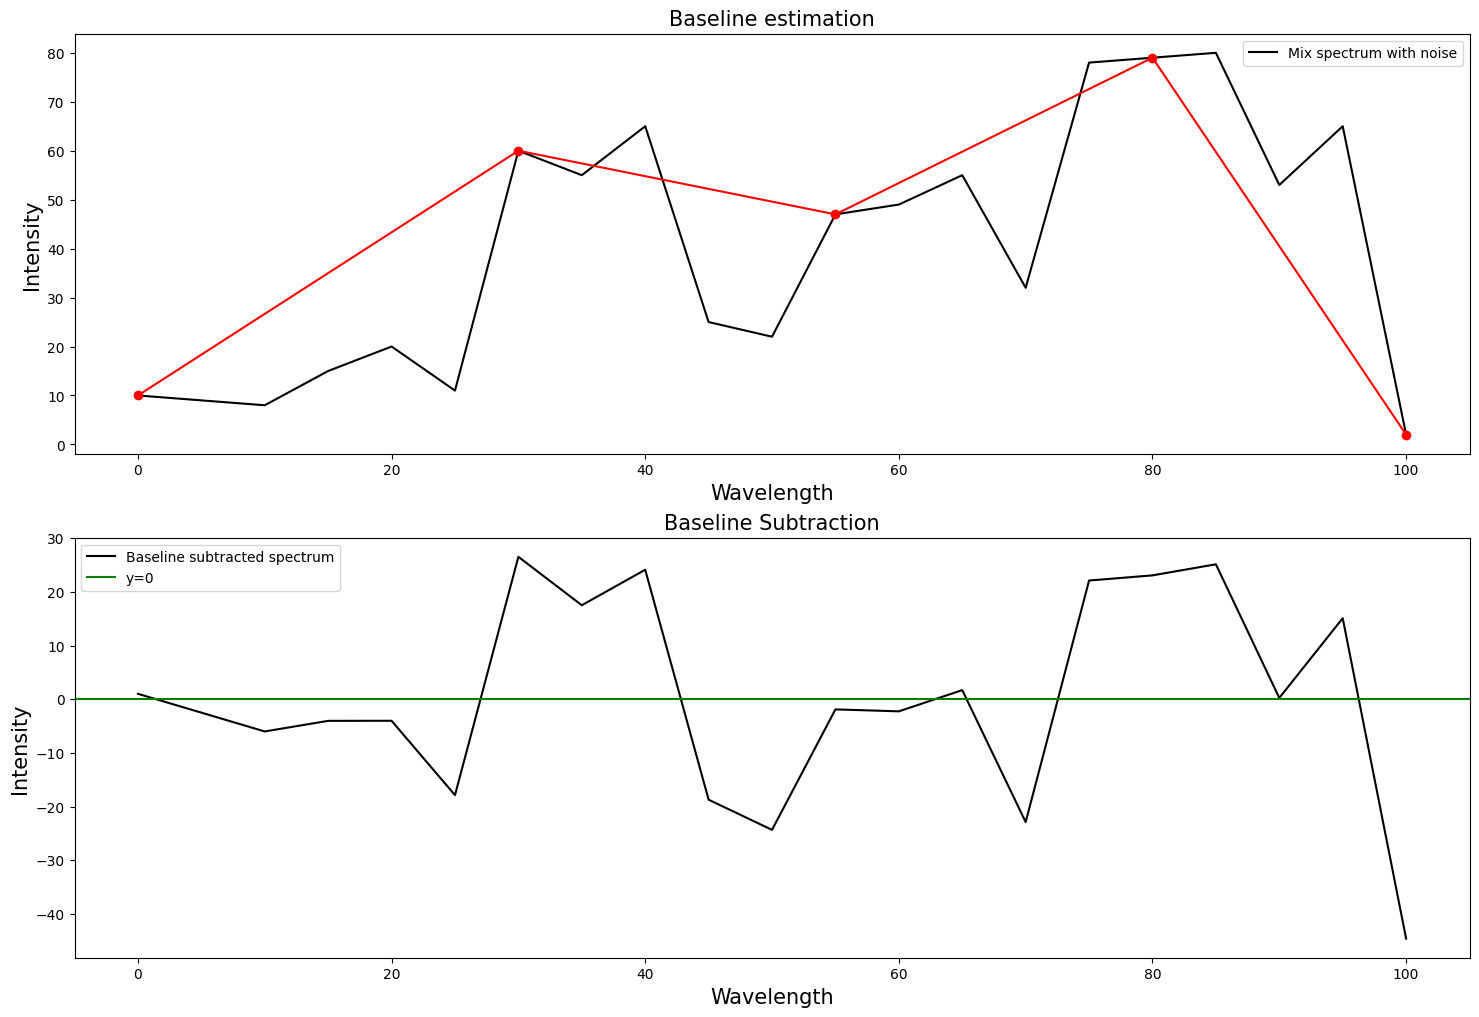

In [50]:
import pandas as pd
import numpy as np
import rampy
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 파일 불러오기
#file = '/content/UR2 BXPC3 raman raw data__24h.csv'
#df = pd.read_csv(file)

# 스펙트럼 계산
wavelengths = [0,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
intensities = [10,8,15,20,11,60,55,65,25,22,47,49,55,32,78,79,80,53,65,2]

# x 데이터
x = np.array(wavelengths)

# y 데이터
y = np.array(intensities)

# 기준점 개수 n 입력받기
n = int(input("기준점 개수: "))

# 기준점 예외처리
if n < 2:
    print("기준점은 2개 이상 필요합니다.")
    exit()

# 기준점 인덱스
nlist = []
for i in range(0, n - 1):
    nlist.append(int(len(x) / (n - 1) * i))
nlist.append(len(x) - 1)

# 기준점 x, y좌표
c = []
d = []
for i in nlist:
    c.append(x[i])
    d.append(y[i])


# Baseline 계산
def baseline_arPLS(y, ratio=1e-6, lam=100, niter=10):
    L = len(y)
    diag = np.ones(L - 2)
    D = sparse.spdiags([diag, -2 * diag, diag], [0, -1, -2], L, L - 2)
    H = lam * D.dot(D.T)
    w = np.ones(L)
    W = sparse.spdiags(w, 0, L, L)
    crit = 1
    count = 0
    while crit > ratio:
        z = linalg.spsolve(W + H, W * y)
        d = y - z
        dn = d[d < 0]
        m = np.mean(dn)
        s = np.std(dn)
        w_new = 1 / (1 + np.exp(2 * (d - (2 * s - m)) / s))
        crit = norm(w_new - w) / norm(w)
        w = w_new
        W.setdiag(w)
        count += 1
        if count > niter:
            print('Maximum number of iterations exceeded')
            break
    return z

baseline = baseline_arPLS(y)

# Baseline 적용
intensities_corrected = y - baseline

# 그래프 형식 지정
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12))

# ax1 그래프 (기존, 기준점)
ax1.plot(x, y, color='black', label='Mix spectrum with noise')
ax1.plot(c, d, 'ro-')
ax1.set_title('Baseline estimation', fontsize=15)
ax1.set_xlabel('Wavelength', fontsize=15)
ax1.set_ylabel('Intensity', fontsize=15)
ax1.legend()


# ax2 그래프 (기준점 삭제된 그래프 + Baseline)
ax2.plot(x, intensities_corrected, color='black', label='Baseline subtracted spectrum')
ax2.axhline(y=0, color='green', label='y=0')
ax2.set_title('Baseline Subtraction', fontsize=15)
ax2.set_xlabel('Wavelength', fontsize=15)
ax2.set_ylabel('Intensity', fontsize=15)
ax2.legend()

# 그래프 띄우기
plt.show()
